<a href="https://colab.research.google.com/github/goglom/MMAD/blob/main/Problem_3/Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

%matplotlib inline

In [9]:
names = [
  'age',
  'workclass',
  'fnlwgt',
  'education',
  'education-num',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'capital-gain',
  'capital-loss',
  'hours-per-week',
  'native-country',
  'target'
]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None, index_col=False, names=names)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Кодируем нечисловые признаки

In [10]:
dataEncoded = data.copy()

encoder = LabelEncoder()

for column in dataEncoded.columns:
    if not is_numeric_dtype(dataEncoded[column]):
        dataEncoded[column] = encoder.fit_transform(dataEncoded[column])

dataEncoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [11]:
def plot_tree(cls):
    plt.figure(figsize=(25, 14))
    tree.plot_tree(cls, feature_names=names, fontsize=10, filled=True, max_depth=3, 
               class_names=['"<=50K"', '">50K"'], impurity =False)

Score =  0.8051102512130704


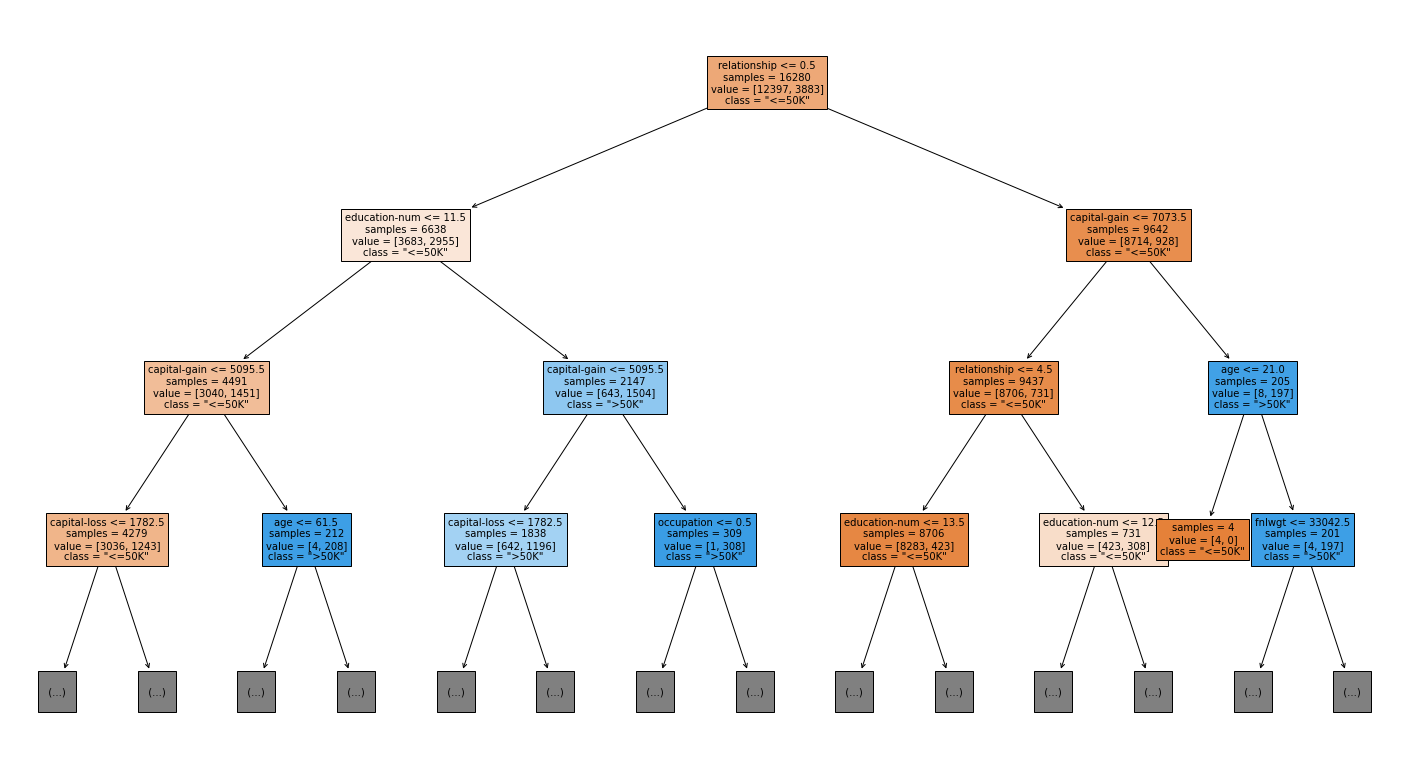

In [12]:
X = dataEncoded.drop('target', axis=1).to_numpy()
y = dataEncoded['target'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

print('Score = ', clf.score(X_test, y_test))

plot_tree(clf)

In [13]:
очка = []
глубины = list(range(1, 100, 4))

for макс_глубина in глубины:
    model = tree.DecisionTreeClassifier(random_state=0, max_depth=макс_глубина)
    skf = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(estimator=model, X=X, y=y,
                                cv=skf, scoring='accuracy', n_jobs=-1)
    очка.append(np.mean(cv_scores))

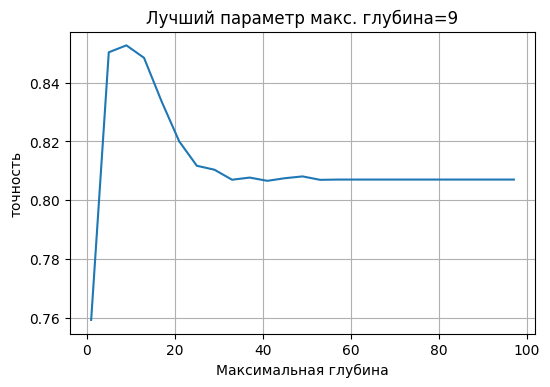

In [14]:
plt.figure(dpi=100)
plt.title(f'Лучший параметр макс. глубина={глубины[np.argmax(очка)]}')
plt.xlabel("Максимальная глубина")
plt.ylabel("точность")
plt.plot(глубины, очка)
plt.grid();

# Пункт 4

In [15]:
gbooster = GradientBoostingClassifier(n_estimators=5, random_state=0)
gbooster.fit(X_train, y_train)

print('Score = ', gbooster.score(X_test, y_test))

Score =  0.8032676125545114


In [16]:
gbooster.feature_importances_

array([0.0025195 , 0.        , 0.        , 0.        , 0.19449589,
       0.        , 0.        , 0.5360854 , 0.        , 0.        ,
       0.26231847, 0.        , 0.00458074, 0.        ])

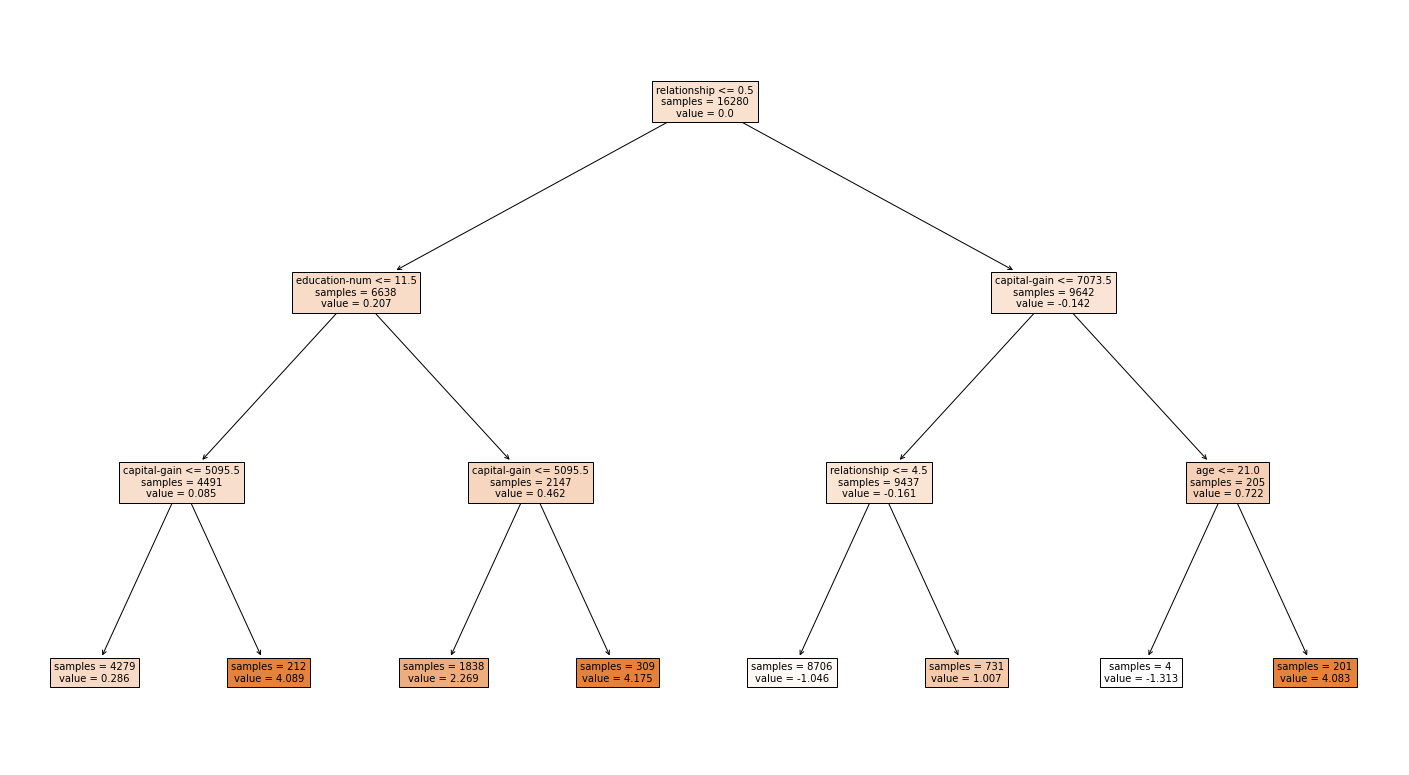

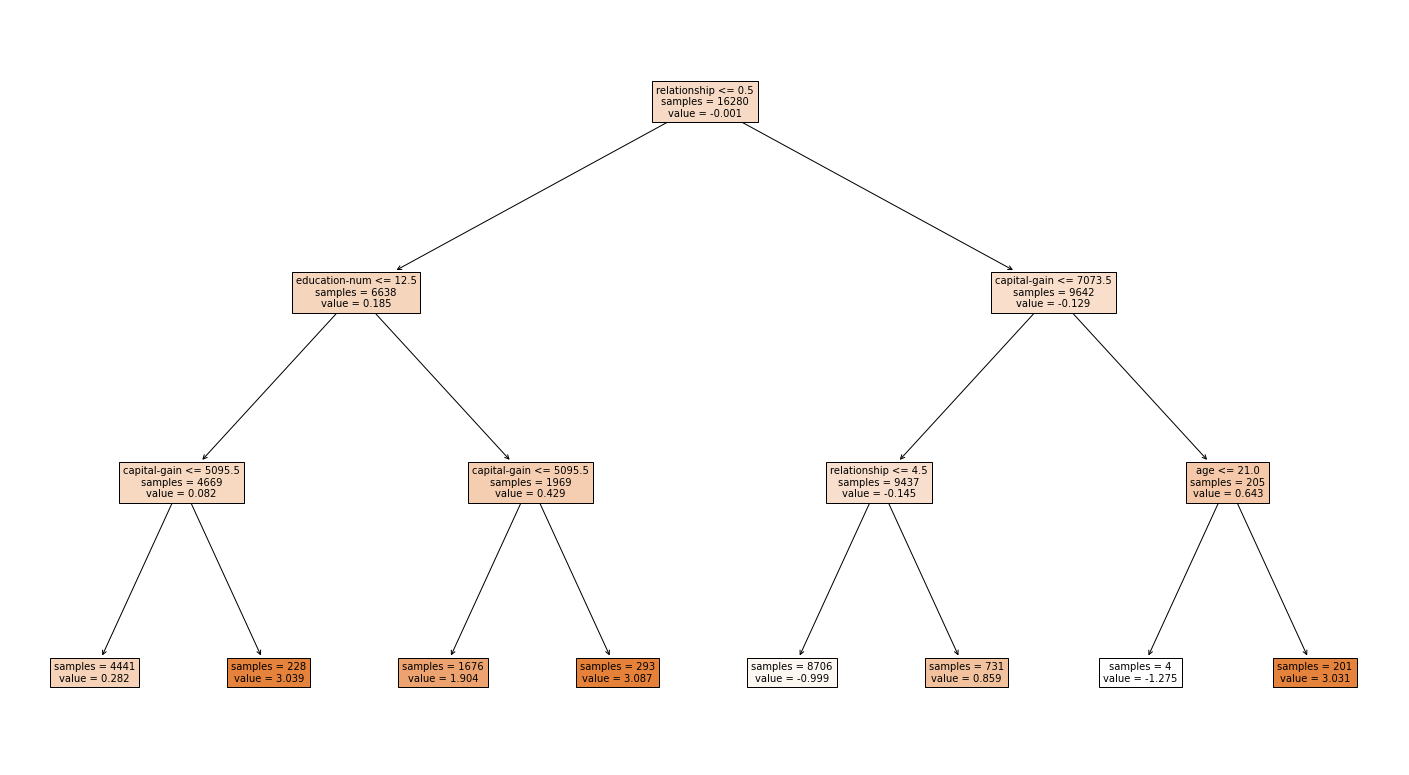

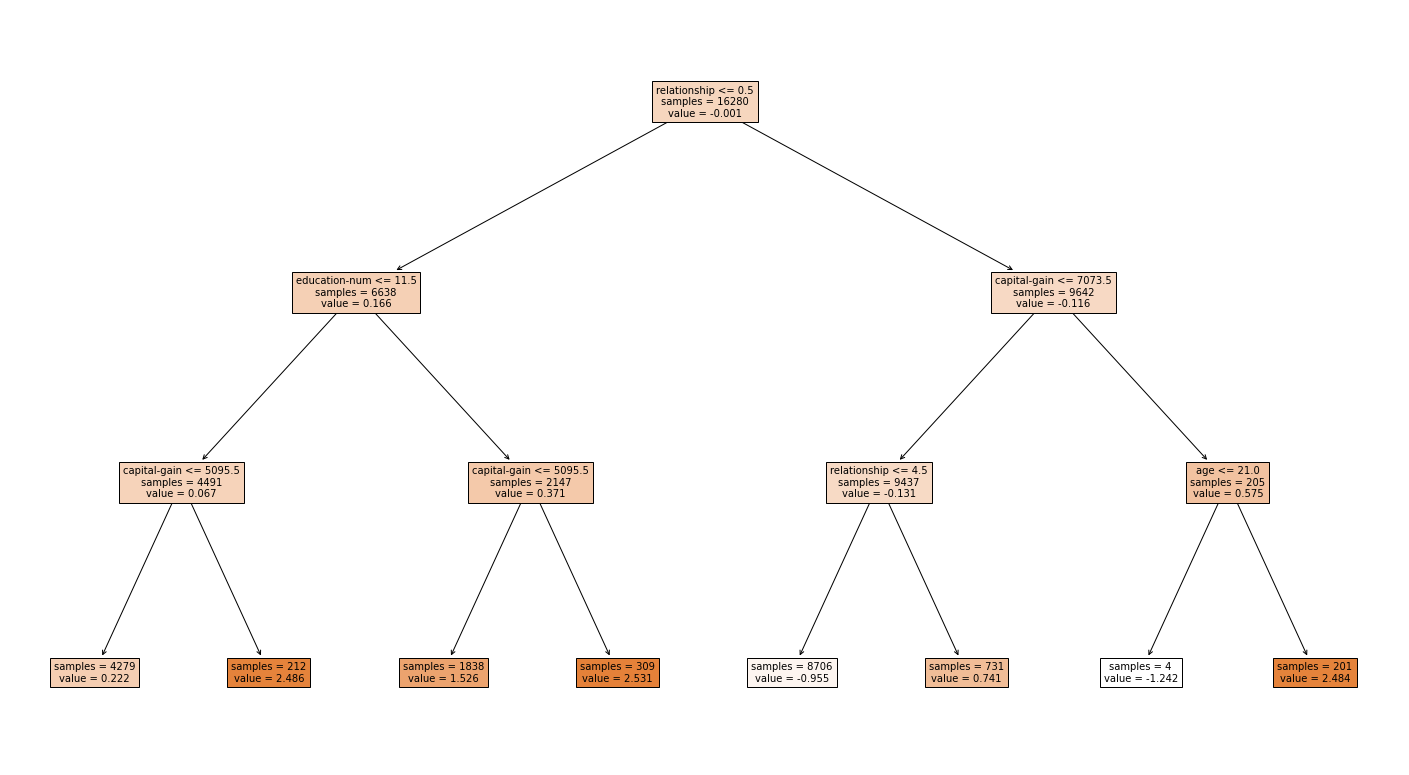

In [17]:
plot_tree(gbooster.estimators_[0, 0])
plot_tree(gbooster.estimators_[1, 0])
plot_tree(gbooster.estimators_[2, 0])

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [5, 25, 125, 625],
    'max_depth' : [3, 5, 10]
}

clf = GridSearchCV(GradientBoostingClassifier(), cv=3, param_grid=params, n_jobs=-1, 
                   scoring='accuracy')

clf.fit(X, y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [5, 25, 125, 625]},
             scoring='accuracy')

In [52]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 125}

In [41]:
params_pairs = clf.cv_results_['params']
scores = clf.cv_results_['mean_test_score']
res = {}

for i, x in enumerate(params_pairs):
    dst = res.setdefault(x['max_depth'], ([], []))
    dst[0].append(x['n_estimators'])
    dst[1].append(scores[i])



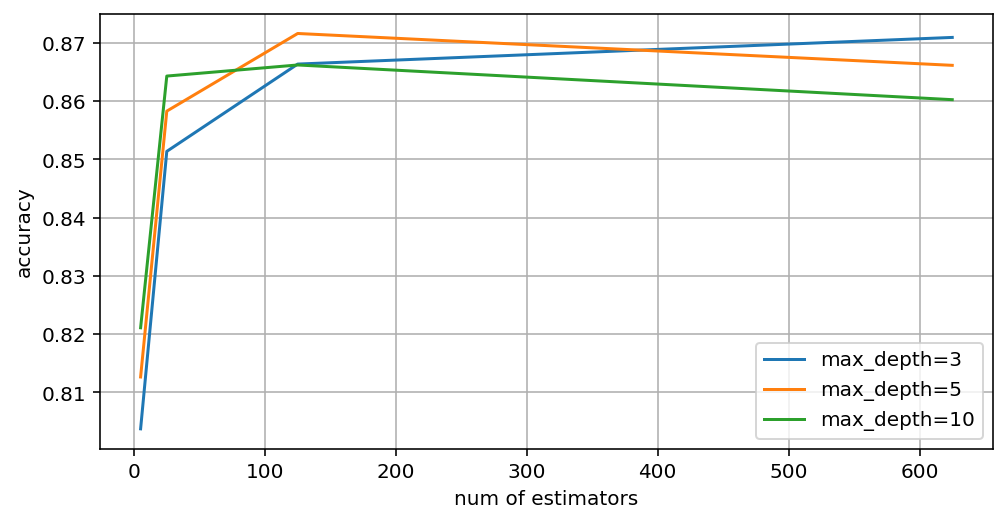

In [51]:
plt.figure(figsize=(8, 4), dpi=144)

for max_depth, (estimators_n, scores) in res.items():
    plt.plot(estimators_n, scores, label=f'max_depth={max_depth}')

plt.ylabel('accuracy')
plt.xlabel('num of estimators')
plt.grid()
plt.legend();

# Пункт 5

Найти пару гшлубина число деревьев 
рассказать гБ


In [ ]:
rndtree_scores = []
rnd_tree_num = list(range(1, 260, 20))
for i in rnd_tree_num:
    model = RandomForestClassifier(n_estimators=i, random_state=0)
    skf = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(estimator=model, X=X, y=y, cv=skf, scoring='accuracy', n_jobs=-1)
    rndtree_scores.append(np.mean(cv_scores))

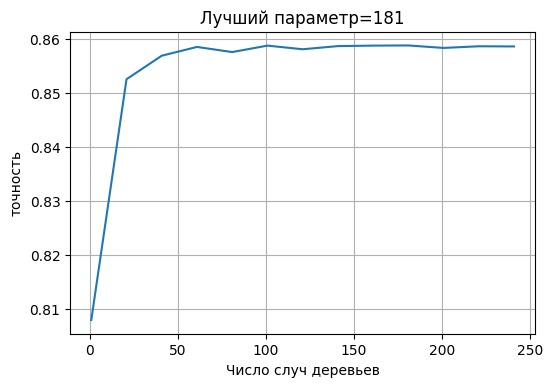

In [ ]:
plt.figure(dpi=100)
plt.title(f'Лучший параметр={rnd_tree_num[np.argmax(rndtree_scores)]}')
plt.xlabel("Число случ деревьев")
plt.ylabel("точность")
plt.plot(rnd_tree_num, rndtree_scores)
plt.grid();